# Sample Insurance Claim Prediction Dataset

**Source:** 

https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset#insurance2.csv

**Content:**


This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

- age : age of policyholder 


- sex: gender of policy holder (female=0, male=1) 


- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 


- steps: average walking steps per day of policyholder 


- children: number of children / dependents of policyholder 


- smoker: smoking state of policyholder (non-smoke=0;smoker=1) 


- region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 


- charges: individual medical costs billed by health insurance 


- insuranceclaim: yes=1, no=0

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

from itertools import product

## Data Acquisition and Preparation

In [217]:
# Load the Data
insurance_df = pd.read_csv('data/insurance3r2.csv')
# data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSegadZ_73iOuFayZ9HyfZLoQq6Hnc3MMoBKHLTY3Fdm6zFn6ht4MvY6pBqABZG7n6V_9386vC1u9HR/pub?output=csv"
# insurance_df = pd.read_csv(data_path)

In [218]:
insurance_df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [219]:
X = insurance_df.iloc[:,0:8]
Y = insurance_df.iloc[:,8]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 106)

In [221]:
insurance_df.head(3)

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,3009,0,1,3,16884.9240,1
1,18,1,33.77,3008,1,0,2,1725.5523,1
2,28,1,33.00,3009,3,0,2,4449.4620,0


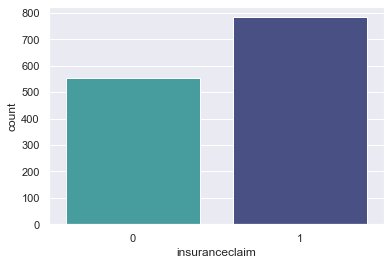

In [222]:
sns.countplot(x = 'insuranceclaim', data = insurance_df, palette = "mako_r")
plt.show()

In [223]:
countSucceedInsuranceClaim = len(insurance_df[insurance_df.insuranceclaim == 1])
countFaileInsuranceClaim = len(insurance_df[insurance_df.insuranceclaim == 0])
print("Percentage of customer succeed in insurance claim: {:.2f}%".format((countSucceedInsuranceClaim)/(len(insurance_df))*100))
print("Percentage of customer fail in insurance claim: {:.2f}%".format((countFaileInsuranceClaim)/(len(insurance_df))*100))

Percentage of customer succeed in insurance claim: 58.52%
Percentage of customer fail in insurance claim: 41.48%


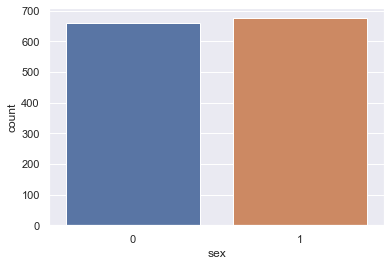

In [224]:
sns.countplot(x = 'sex', data = insurance_df)
plt.show()

In [225]:
countFemale = len(insurance_df[insurance_df.sex == 0])
countMale = len(insurance_df[insurance_df.sex == 1])
print("Percentage of female in insurance claim: {:.2f}%".format((countFemale)/(len(insurance_df))*100))
print("Percentage of male in insurance claim: {:.2f}%".format((countMale)/(len(insurance_df))*100))

Percentage of female in insurance claim: 49.48%
Percentage of male in insurance claim: 50.52%


In [226]:
insurance_df.groupby('insuranceclaim').mean()

,age,sex,bmi,steps,children,smoker,region,charges
insuranceclaim,,,,,,,,
0,37.309910,0.486486,27.881586,6550.787387,1.681081,0.045045,1.488288,8821.421892
1,40.551724,0.518519,32.635179,4462.338442,0.679438,0.318008,1.535121,16423.928277


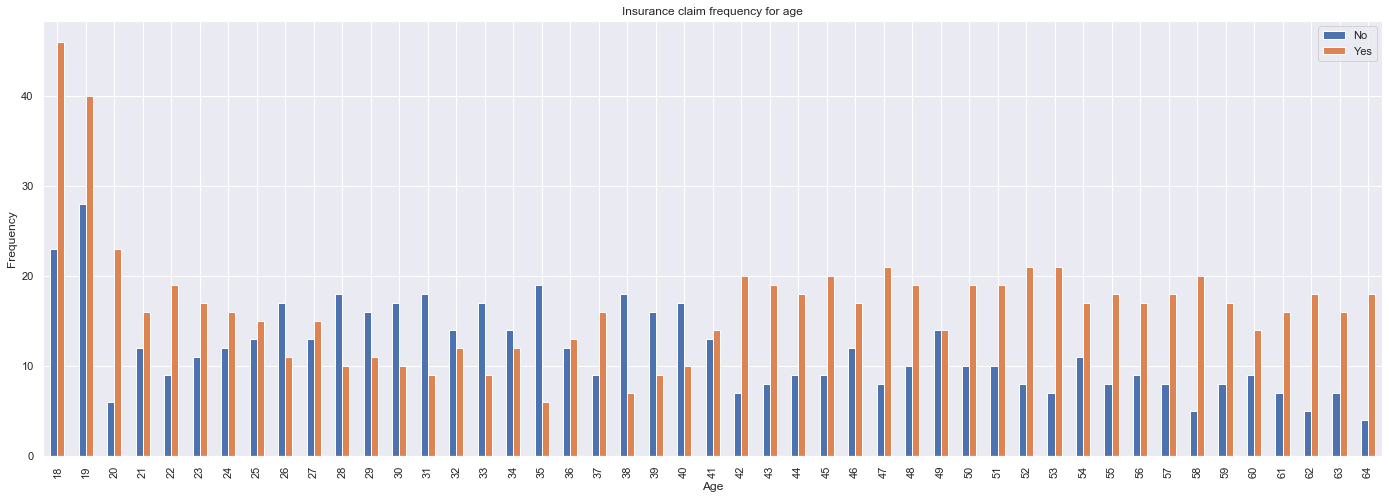

In [227]:
pd.crosstab(insurance_df.age, insurance_df.insuranceclaim).plot(kind = "bar", figsize = (24, 8))
plt.title('Insurance claim frequency for age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No','Yes'])
plt.show()

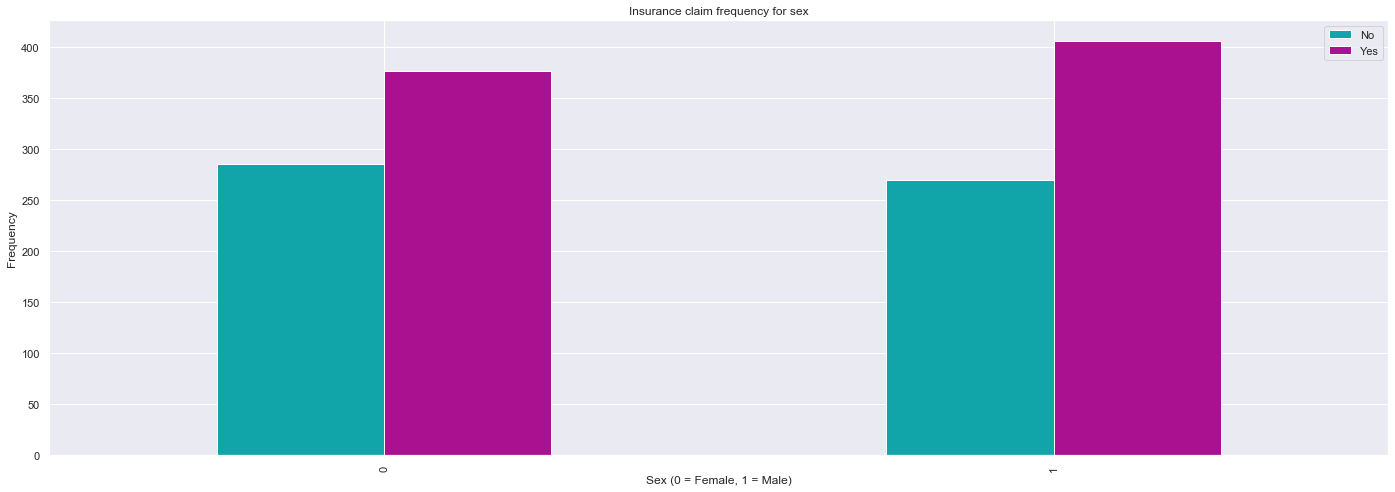

In [228]:
pd.crosstab(insurance_df.sex, insurance_df.insuranceclaim).plot(kind = "bar", figsize = (24, 8), color=['#11A5AA','#AA1190'])
plt.title('Insurance claim frequency for sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(['No','Yes'])
plt.show()

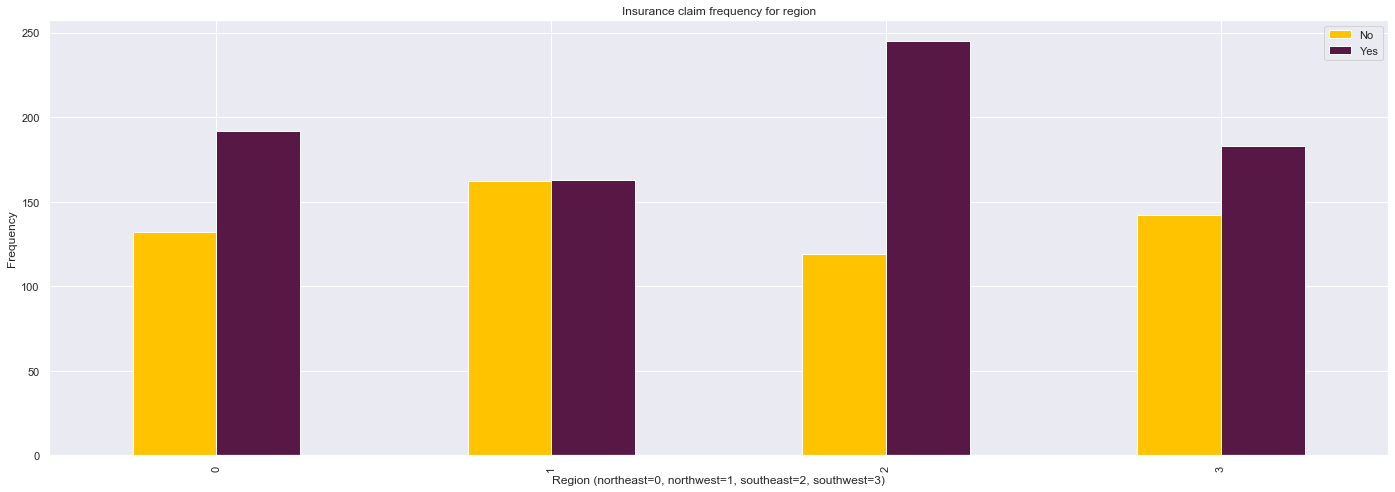

In [229]:
pd.crosstab(insurance_df.region, insurance_df.insuranceclaim).plot(kind = "bar", figsize = (24, 8), color = ['#FFC300','#581845'])
plt.title('Insurance claim frequency for region')
plt.xlabel('Region (northeast=0, northwest=1, southeast=2, southwest=3)')
plt.ylabel('Frequency')
plt.legend(['No','Yes'])
plt.show()

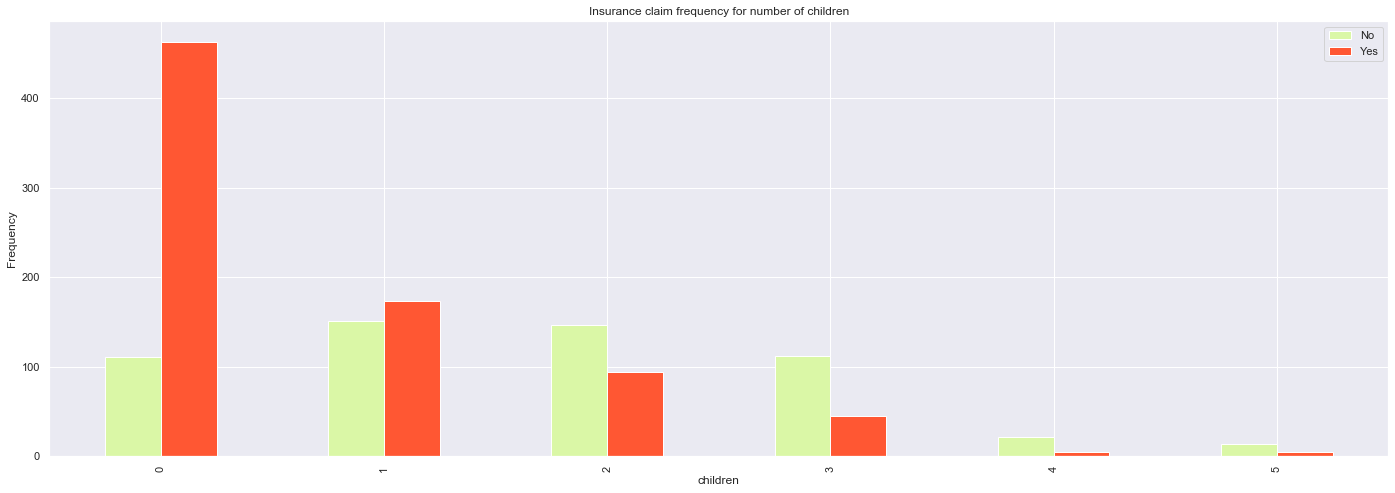

In [230]:
pd.crosstab(insurance_df.children, insurance_df.insuranceclaim).plot(kind = "bar", figsize = (24, 8), color = ['#DAF7A6','#FF5733' ])
plt.title('Insurance claim frequency for number of children')
plt.xlabel('children')
plt.ylabel('Frequency')
plt.legend(['No','Yes'])
plt.show()

## Data Analysis Part 1

### Logistic Regression

In [231]:
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test) * 100
accuracies['Logistic Regression'] = acc
print("Accuracy on Test Set for Logistic Regression:  {:.2f}%".format(acc))

Accuracy on Test Set for Logistic Regression:  82.34%


### K-Nearest Neighbour (KNN) Classification

In [232]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test) * 100
accuracies['KNN'] = acc
print("Accuracy on Test Set for K-Nearest Neighbor (k = 2): {:.2f}%".format(acc))

Accuracy on Test Set for K-Nearest Neighbor (k = 2): 60.45%


### Support Vector Machine (SVM) Algorithm

In [233]:
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
acc = svm.score(X_test, y_test) * 100
accuracies['SVM'] = acc
print("Accuracy on Test Set for SVM Algorthm: {:.2f}%".format(acc))

Accuracy on Test Set for SVM Algorthm: 58.46%


### Naive Bayes Algorithm

In [234]:
nb = GaussianNB()
nb.fit(X_train, y_train)
acc = nb.score(X_train, y_train) * 100
accuracies['Naive Bayes'] = acc
print("Accuracy on Test Set for Naive Bayes Algorthm: {:.2f}%".format(acc))

Accuracy on Test Set for Naive Bayes Algorthm: 82.48%


### Decision Tree Algorithm

In [235]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Accuracy on Test Set for Decision Tree Algorthm: {:.2f}%".format(acc))

Accuracy on Test Set for Decision Tree Algorthm: 97.01%


### Random Forest Classification

In [236]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test) * 100
accuracies["Random Forest"] = acc
print("Accuracy on Test Set for Random Forest Algorthm: {:.2f}%".format(acc))

Accuracy on Test Set for Random Forest Algorthm: 92.29%


### Comparing Models

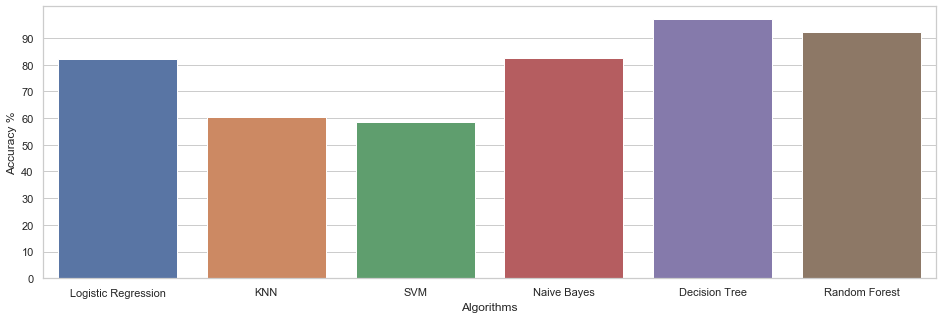

In [237]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

In [238]:
sorted(accuracies.items(), key = lambda x:x[1], reverse = True)

[('Decision Tree', 97.01492537313433),
 ('Random Forest', 92.28855721393035),
 ('Naive Bayes', 82.47863247863248),
 ('Logistic Regression', 82.33830845771143),
 ('KNN', 60.447761194029844),
 ('SVM', 58.457711442786064)]

## Data Analysis Part 2

In [239]:
accuracies_new = {}

**Decision Tree**

In [240]:
def decisionTreeParameter(parameters, X_train, y_train, X_test, y_test):
    acc = max_acc = 0
    best_parameter =[]
    for parameter in parameters:
        criterion, splitter, max_features = parameter
        dtc = DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_features = max_features)
        dtc.fit(X_train, y_train)
        acc = dtc.score(X_test, y_test) * 100
        if max_acc < acc:
            best_parameter = parameter
            max_acc = acc
            best_model = dtc
    return best_parameter, max_acc, best_model
criterion = ['gini','entropy']
splitter = ['best', 'random']
max_features = [None, "auto", "sqrt", "log2"]
parameters = list(product(criterion, splitter, max_features))
parameter_dt, accuracies_new['Decision Tree'], dtc = decisionTreeParameter(parameters, X_train, y_train, X_test, y_test)

In [241]:
print(parameter_dt)

('entropy', 'best', None)


**Logistic Regression**

In [245]:
def logisticRegressionParameter(parameters, X_train, y_train, X_test, y_test):
    acc = max_acc = 0
    best_parameter =[]
    for parameter in parameters:
        penalty, dual, fit_intercept, multi_class, warm_start = parameter
        lr = LogisticRegression(penalty = penalty, dual = dual, fit_intercept = fit_intercept,
                                multi_class = multi_class, warm_start = warm_start)
        try:
            lr.fit(X_train, y_train)
            acc = lr.score(X_test, y_test) * 100
            if max_acc < acc:
                best_parameter = parameter
                max_acc = acc
                best_model = dtc
        except:
            continue
    return best_parameter, max_acc, best_model

penalty = ['l1', 'l2','elasticnet','none']
dual = [True, False]
fit_intercept = [True, False]
multi_class = ['auto', 'ovr', 'multinomial']
warm_start = [True, False]
parameters = list(product(penalty, dual, fit_intercept, multi_class, warm_start))
parameter_lr, accuracies_new['Logistic Regression'], lr = logisticRegressionParameter(parameters, X_train, y_train, X_test, y_test)

In [246]:
print(parameter_lr)

('l1', False, True, 'auto', False)


**Random Forest**

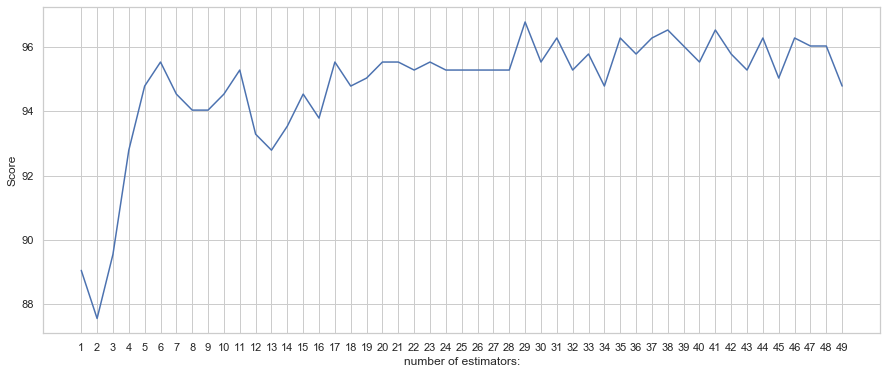

Accuracy on Test Set for Random Forest Classifier (n = 28) is: 96.77%


In [74]:
def findBestN(X_train, y_train, X_test, y_test, k_2, k_1 = 1):
    # try to find best k value
    scoreList = []
    max_acc = acc = 0
    for i in range(k_1, k_2):
        rf = RandomForestClassifier(n_estimators = i)
        rf.fit(X_train, y_train)
        acc = rf.score(X_test, y_test) * 100
        scoreList.append(acc)
        if max_acc < acc:
            best_model = rf
            max_acc = acc
    plt.figure(figsize = (15, 6))
    plt.plot(range(k_1,k_2), scoreList)
    plt.xticks(np.arange(k_1, k_2, 1))
    plt.xlabel("number of estimators:")
    plt.ylabel("Score")
    plt.show()
    
    index = scoreList.index(max(scoreList))
    print("Accuracy on Test Set for Random Forest Classifier (n = {:d}) is: {:.2f}%".format(index, max_acc))
    return max_acc, best_model
accuracies_new["Random Forest"], rf = findBestN(X_train, y_train, X_test, y_test, 50)

**KNN**

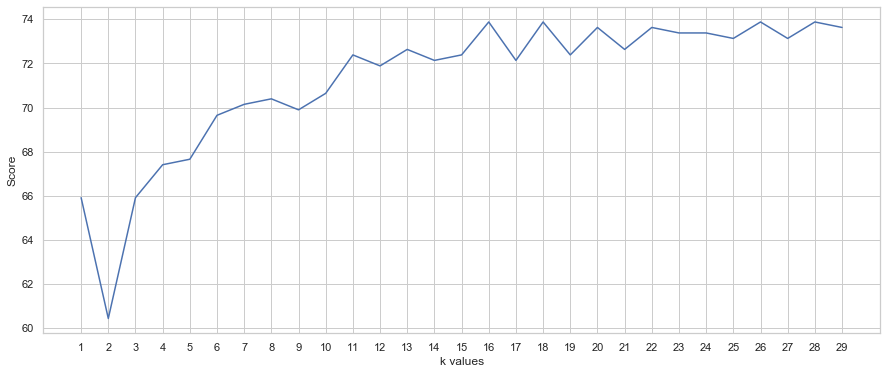

Accuracy on Test Set for K-Nearest Neighbor (k = 15) is: 73.63%


In [75]:
def findBestK(X_train, y_train, X_test, y_test, k_2, k_1 = 1):
    # try to find best k value
    scoreList = []
    max_acc = acc = 0
    for i in range(k_1, k_2):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test) *100
        scoreList.append(acc)
        if max_acc < acc:
            best_model = knn
            max_acc = acc
            
    plt.figure(figsize = (15, 6))
    plt.plot(range(k_1,k_2), scoreList)
    plt.xticks(np.arange(k_1, k_2, 1))
    plt.xlabel("k values")
    plt.ylabel("Score")
    plt.show()

    index = scoreList.index(max(scoreList))
    print("Accuracy on Test Set for K-Nearest Neighbor (k = {:d}) is: {:.2f}%".format(index, acc))
    return max_acc, best_model
accuracies_new['KNN'], knn = findBestK(X_train, y_train, X_test, y_test, 30)

**Support Vector Machine (SVM) Algorithm**

In [76]:
def svmParameter(parameters, X_train, y_train, X_test, y_test):
    acc = max_acc = 0
    best_parameter =[]
    for parameter in parameters:
        kernel, gamma, shrinking, class_weight, probability = parameter
        svm = SVC(kernel = kernel, gamma = gamma, shrinking = shrinking, 
                  class_weight=class_weight, probability=probability)
        try:
            svm.fit(X_train, y_train)
            acc = svm.score(X_test, y_test) * 100
            if max_acc < acc:
                best_parameter = parameter
                max_acc = acc
                best_model = svm
        except:
            continue
    return best_parameter, max_acc, best_model

kernel = ['rbf', 'sigmoid', 'precomputed']
gamma = ['scale','auto']
shrinking = [True, False]
class_weight = [None, 'balanced']
probability = [True, False]
parameters = list(product(kernel, gamma, shrinking, class_weight, probability))
parameter_svm, accuracies_new['SVM'], svm = svmParameter(parameters, X_train, y_train, X_test, y_test)

**Naive Bayes**

In [77]:
accuracies_new['Naive Bayes'] = accuracies['Naive Bayes']
nb = nb

In [78]:
sorted(accuracies_new.items(), key = lambda x:x[1], reverse = True)

[('Decision Tree', 97.76119402985076),
 ('Random Forest', 96.76616915422885),
 ('Logistic Regression', 87.81094527363184),
 ('Naive Bayes', 82.47863247863248),
 ('KNN', 73.88059701492537),
 ('SVM', 72.636815920398)]

## Confusin Matrix

In [79]:
# Predict values
y_dtc = dtc.predict(X_test)
y_rf = rf.predict(X_test)
y_lr = lr.predict(X_test)
y_nb = nb.predict(X_test)
y_knn = knn.predict(X_test)
y_svm = svm.predict(X_test)

**1. Decision Tree**

In [80]:
cm_dtc = confusion_matrix(y_test, y_lr)
cm_dtc

array([[168,   4],
       [  5, 225]])

In [81]:
pd.crosstab(y_test, y_dtc,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,168,4,172
1,5,225,230
All,173,229,402


In [82]:
print(classification_report(y_test,y_dtc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       172
           1       0.98      0.98      0.98       230

    accuracy                           0.98       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.98      0.98      0.98       402



**2. Random Forest**

In [83]:
cm_rf = confusion_matrix(y_test, y_rf)
cm_rf

array([[169,   3],
       [ 10, 220]])

In [84]:
pd.crosstab(y_test, y_rf,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,169,3,172
1,10,220,230
All,179,223,402


In [85]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       172
           1       0.99      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



**3. Logistic Regression**

In [86]:
cm_lr = confusion_matrix(y_test, y_lr)
cm_lr

array([[168,   4],
       [  5, 225]])

In [87]:
pd.crosstab(y_test, y_lr,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,168,4,172
1,5,225,230
All,173,229,402


In [88]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       172
           1       0.98      0.98      0.98       230

    accuracy                           0.98       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.98      0.98      0.98       402



## Data Analysis Part 3

In [90]:
X_cols = ['age', 'bmi', 'steps']

#Load the X data set
X = insurance_df[X_cols].values

#Initialize the data and column length variables
data_length = len(insurance_df)
column_length = len(insurance_df[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = insurance_df['charges'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [93]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0  13051.266213
1  10566.295753
2  17060.969556
3  19299.374734
4   5183.680838

Intercept: 11795.546540263138
          age       bmi     steps
0  209.262238 -7.207208 -1.249692

Mean Squared Error (MSE):123604951.02
Variance Score (R^2):0.19


In [94]:
X_cols = ['steps']

#Load the X data set
X = insurance_df[X_cols].values

#Initialize the data and column length variables
data_length = len(insurance_df)
column_length = len(insurance_df[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = insurance_df['charges'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [95]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0  15767.763269
1  17437.360959
2  15774.475219
3  17450.784860
4  15771.119244

Intercept: 22488.10372169449
      steps
0 -1.677988

Mean Squared Error (MSE):124431506.09
Variance Score (R^2):0.02


### Prepare the dataset

In [110]:
insurance_df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [210]:
X = insurance_df.iloc[:,0:8]
Y = insurance_df.iloc[:,8]
pca = PCA(n_components = 0.9) # Keep more than 90% information after dimentional reduction
pca.fit(X,Y)
pd.DataFrame(pca.components_,columns=X.columns)

,age,sex,bmi,steps,children,smoker,region,charges
0,0.000347,0.000002,0.000104,-0.064164,0.000007,0.000026,-4.726556e-07,0.997939


Charges is the most important variable that influence insurance claim result.

In [106]:
insurance_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [199]:
df = insurance_df[insurance_df['insuranceclaim']==1]
X = df.iloc[:,0:7]
Y = df.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

**Multiple Linear Regression 1: Apply all features**

In [211]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Variance Score R^2: %.2f" % r2_score(y_test, y_pred))
lin_reg.score(X_train, y_train)

Mean Squared Error (MSE): 35032785.01
Variance Score R^2: 0.82


0.8042797947822258

**Multiple Linear Regression 2: Remove region**

In [170]:
X_train_1 = X_train.iloc[:, 0:6]
X_test_1 = X_test.iloc[:,0:6]

In [171]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_1, y_train)
y_pred_1 = lin_reg.predict(X_test_1)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred_1))
print("Variance Score R^2: %.2f" % r2_score(y_test, y_pred_1))
lin_reg.score(X_train_1, y_train)

Mean Squared Error (MSE): 44248286.67
Variance Score R^2: 0.79


0.8171261312110214

**Multiple Linear Regression 3: Remove sex**

In [172]:
X_train_2 = X_train.iloc[:, [0,2,3,4,5]]
X_test_2 = X_test.iloc[:,[0,2,3,4,5]]

In [173]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_2, y_train)
y_pred_2 = lin_reg.predict(X_test_2)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred_2))
print("Variance Score R^2: %.2f" % r2_score(y_test, y_pred_2))
lin_reg.score(X_train_2, y_train)

Mean Squared Error (MSE): 44163705.06
Variance Score R^2: 0.79


0.8170787175601205

**Multiple Linear Regression 4: Remove children**

In [174]:
X_train_3 = X_train.iloc[:, [0,2,3,5]]
X_test_3 = X_test.iloc[:,[0,2,3,5]]

In [175]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_3, y_train)
y_pred_3 = lin_reg.predict(X_test_3)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred_3))
print("Variance Score R^2: %.2f" % r2_score(y_test, y_pred_3))
lin_reg.score(X_train_3, y_train)

Mean Squared Error (MSE): 44799990.21
Variance Score R^2: 0.78


0.8151660816961669

**Multiple Linear Regression 5: Remove smoker**

In [176]:
X_train_4 = X_train.iloc[:, [0,2,3]]
X_test_4 = X_test.iloc[:,[0,2,3]]

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_4, y_train)
y_pred_4 = lin_reg.predict(X_test_4)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred_4))
print("Variance Score R^2: %.2f" % r2_score(y_test, y_pred_4))
lin_reg.score(X_train_4, y_train)

Mean Squared Error (MSE): 189316580.38
Variance Score R^2: 0.09


0.09865948022115599

The accuracy rate still around 81% after remove some irrelevant features(including region, sex and children). We use this model can recommend the insurance charges for customer to increase their insurance claim rate, the R^2 score of this model is 0.815.